In [3]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.size": 14,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

import s3dexp.db

            expname  avg_wall_ms  avg_cpu_ms  num_workers     hostname
0     baseline_read     3.185887    0.244261            8  cloudlet027
1   baseline_decode     3.351392    4.623989            8  cloudlet027
2  baseline_redness     3.429903    6.312941            8  cloudlet027
3   baseline_redbus     3.656751    6.535856            8  cloudlet027


<IPython.core.display.Javascript object>


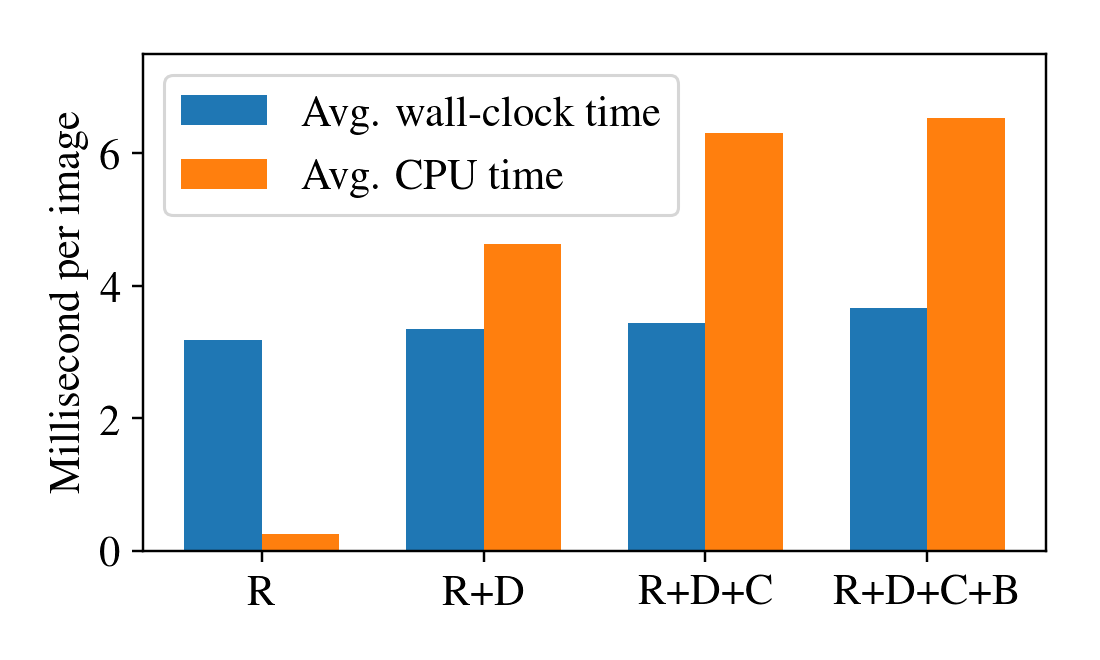

In [10]:
dataset = 'jpeg/flickr50k'
ext = 'jpg'
num_workers=8
hostname='cloudlet027'
expnames = ['baseline_read', 'baseline_decode', 'baseline_redness', 'baseline_redbus']

%matplotlib notebook

df = pd.read_sql(
    'SELECT expname, avg_wall_ms, avg_cpu_ms, num_workers, hostname FROM EurekaExp \
        WHERE basedir LIKE %s AND num_workers=%s AND hostname=%s AND expname in ({})'.format(','.join(['%s']*len(expnames))),
    s3dexp.db.engine,
    params=["%{}%".format(dataset), num_workers, hostname] + expnames)

print(df)

x = np.arange(len(df))
width = .35

# pretty_names = ["Read", "Decode", "Redness", "Red Bus"]
pretty_names = ['R', 'R+D', 'R+D+C', 'R+D+C+B']

fig, ax = plt.subplots(figsize=(5,3))
ax.bar(x - width/2, df['avg_wall_ms'], width, label="Avg. wall-clock time")
ax.bar(x + width/2, df['avg_cpu_ms'], width, label="Avg. CPU time")
ax.set_ylabel("Millisecond per image")
ax.set_ylim(0, 7.5)
plt.xticks(x, pretty_names, rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig('motivating-example.pdf', bbox_inches ='tight')

                   expname  avg_wall_ms  avg_cpu_ms
0            baseline_read     3.010344    0.353062
1          baseline_decode     3.744661    6.492536
2         baseline_redness     4.141470    8.386597
3          baseline_redbus     4.502713    8.437689
4     baseline_read-sorted     0.738684    0.333922
5   baseline_decode-sorted     1.826561    6.653334
6  baseline_redness-sorted     2.381611    8.817752
7   baseline_redbus-sorted     2.749776    8.452552


<IPython.core.display.Javascript object>


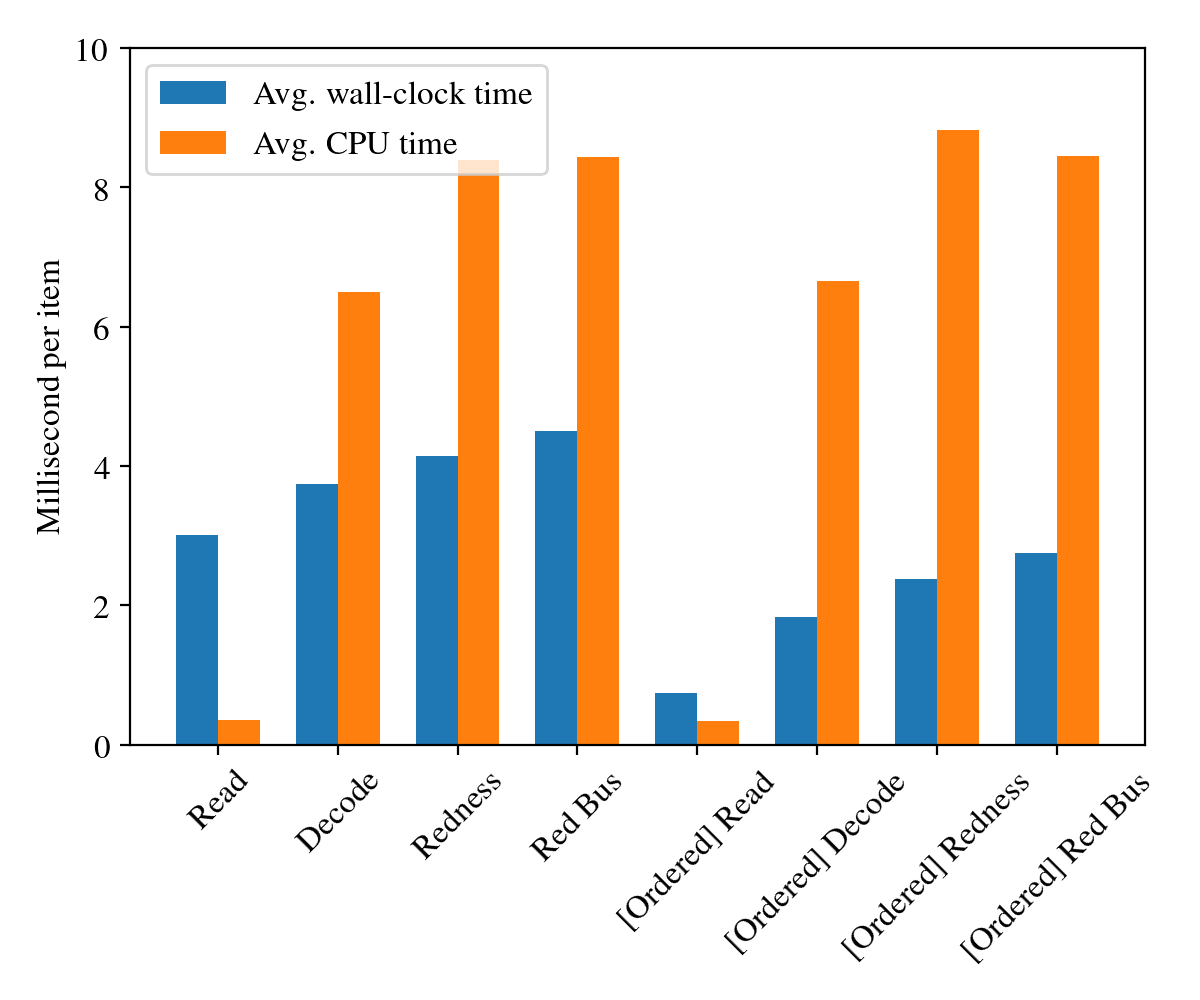

In [107]:
# For Elijah 9/9

dataset = 'jpeg/flickr2500'
ext = 'jpg'
num_workers=4
hostname='cloudlet029'
expnames = ['baseline_read', 'baseline_decode', 'baseline_redness', 'baseline_redbus']
expnames = expnames + [el + '-sorted' for el in expnames]

%matplotlib notebook

df = pd.read_sql(
    'SELECT expname, avg_wall_ms, avg_cpu_ms FROM EurekaExp \
        WHERE basedir LIKE %s AND num_workers=%s AND hostname=%s AND expname in ({})'.format(','.join(['%s']*len(expnames))),
    s3dexp.db.engine,
    params=["%{}%".format(dataset), num_workers, hostname] + expnames)

print(df)

x = np.arange(len(df))
width = .35

pretty_names = ["Read", "Decode", "Redness", "Red Bus"]
pretty_names = pretty_names + [ '[Ordered] ' + el for el in pretty_names]

fig, ax = plt.subplots(figsize=(6,5))
ax.bar(x - width/2, df['avg_wall_ms'], width, label="Avg. wall-clock time")
ax.bar(x + width/2, df['avg_cpu_ms'], width, label="Avg. CPU time")
ax.set_ylabel("Millisecond per item")
ax.set_ylim(0, 10)
plt.xticks(x, pretty_names, rotation=45)
plt.legend()
plt.tight_layout()